In [ ]:
# Market
#from google.colab import drive
#drive.mount('/content/drive')
#change dir to your project folder
%cd /content/drive/My Drive/Colab Notebooks/finance/  

/content/drive/My Drive/Colab Notebooks/finance


In [ ]:
ls

 Amazon.csv                                   Stock_Apple.csv
 AMC.csv                                      Stock_TSLA.csv
 Apple.csv                                    twitter_amazon.ipynb
 corona.csv                                   twitter_corona.ipynb
'finance 0.1 stock data.ipynb'                twitter_corona.txt
'finance 0.2 visulization.ipynb'             'twitter_GME AMC.ipynb'
 GME.csv                                      twitter_hd.ipynb
 “pytorch_feedforward_neural_network.ipynb”   twitter.ipynb


In [ ]:
# https://tryolabs.com/blog/2015/02/17/python-elasticsearch-first-steps/
import json, csv
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob

from datetime import date
today = date.today()
today_date = today.strftime("%m/%d/%y")

# Go to http://apps.twitter.com and create an app.
# The consumer key and secret will be generated for you after
#add your twitter keys
keys = 
consumer_secret = keys[1]
access_token = keys[2]
access_token_secret = keys[3]




class TweetStreamListener(StreamListener):
    def __init__(self):
        super().__init__()
        self.counter = 0
        self.limit = 3000
        self.csvfile = 'x.csv'

    # on success
    def on_data(self, data):
        #### write data
        #with open('twitter_corona.txt','a') as tf:
        #  tf.write(data)
        #return True


        # decode json
        dict_data = json.loads(data)

        # pass tweet into TextBlob
        try: tweet = TextBlob(dict_data["text"])
        except: #handle KeyError
          return True # end current, continue to next twitter feed

        # output sentiment polarity
        #print(tweet.sentiment.polarity)
        
        if tweet.sentiment.polarity != 0:
            with open(self.csvfile,'a', newline='') as hf:
                hf_writer = csv.writer(hf, delimiter=',')
                hf_writer.writerow([today_date, tweet.sentiment.polarity])
            self.counter += 1
    

        # # determine if sentiment is positive, negative, or neutral
        # if tweet.sentiment.polarity < 0:
        #     sentiment = "negative"
        # elif tweet.sentiment.polarity == 0:
        #     sentiment = "neutral"
        # else:
        #     sentiment = "positive"

        # # output sentiment
        # # print(sentiment) 
        # with open('twitter_corona.txt','a') as tf:
        #   tf.write(sentiment)
        #   tf.write('\n')


        if self.counter < self.limit:
            return True # end current, continue to next twitter feed
        else:
            print('Done with', self.csvfile, 'reached the limit ', self.limit)
            return False  # end stream  

    # on failure
    def on_error(self, status):
        print(status)

if __name__ == '__main__':
    # create instance of the tweepy tweet stream listener
    listener1 = TweetStreamListener()
    listener1.csvfile = 'GME.csv'

    listener2 = TweetStreamListener()
    listener2.csvfile = 'AMC.csv'

    listener3 = TweetStreamListener()
    listener3.csvfile = 'Amazon.csv'

    listener4 = TweetStreamListener()
    listener4.csvfile = 'Apple.csv'
    # set twitter keys/tokens
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    # create instance of the tweepy stream
    stream1 = Stream(auth, listener1)
    #stream2 = Stream(auth, listener2)
    stream3 = Stream(auth, listener3)
    stream4 = Stream(auth, listener4)

    # search twitter for keyword
    stream1.filter(track=['GME','Gamestop', 'GameStop'])
    #stream2.filter(track=['AMC','AMC theatres','AMC stock'])
    stream3.filter(track=['Amazon','Amazon stock'])
    stream4.filter(track=['Apple','Apple stock'])

Done with GME.csv reached the limit  3000
Done with Amazon.csv reached the limit  3000
Done with Apple.csv reached the limit  3000


In [ ]:
import pandas as pd
df1 = pd.read_csv('GME.csv', header=None, delimiter = ",")
df1.columns = ['date', 'sentiment']
print(df1.head())
df2 = pd.read_csv('Amazon.csv', header=None, delimiter = ",")
df2.columns = ['date', 'sentiment']
df2.head()


       date  sentiment
0  01/30/21  -0.250000
1  01/30/21   0.100000
2  01/30/21   0.183333
3  01/30/21  -0.500000
4  01/30/21   0.500000


,date,sentiment
0,01/31/21,0.100000
1,01/31/21,-0.100000
2,01/31/21,-0.166667
3,01/31/21,0.100000
4,01/31/21,0.500000


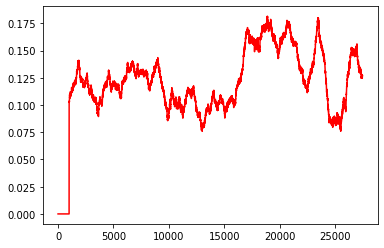

In [ ]:
import matplotlib.pyplot as plt
rolling_1000 = df1.sentiment.rolling(window=1000).mean()
df1['rolling'] = rolling_1000.fillna(0)

plt.plot(df1['rolling'],'r-')
plt.show()


#df1.groupby('class').plot(kind='kde', ax=plt.gca())

In [ ]:
rolling_1000.fillna(0)

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
27472    0.126531
27473    0.127342
27474    0.127192
27475    0.127498
27476    0.126998
Name: sentiment, Length: 27477, dtype: float64

In [ ]:
datelist = df1.date.unique()
#for datetime in datelist:
#    print(datetime, df[df.date == datetime]['corona'].mean())

df1.groupby('date').mean()

,sentiment,rolling
date,,
01/30/21,0.123775,0.119056
01/31/21,0.179346,0.139529
02/02/21,0.083985,0.138104
02/04/21,0.119480,0.113074
